In [3]:
#Lets run K-means on bio word2vec
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

In [16]:
df_final=pd.read_csv("Final_Processed_task.csv")
df_final.head()

,Unnamed: 0,Unnamed: 0.1,cord_uid,section,header
0,0,0,ug7v899j,title,title
1,1,1,ug7v899j,abstract,abstract
2,2,2,ug7v899j,abstract,abstract
3,3,3,ug7v899j,abstract,abstract
4,4,4,ug7v899j,abstract,abstract


In [19]:
df_final.tail(40)

,Unnamed: 0,Unnamed: 0.1,cord_uid,section,header
1838569,1939664,2435772,ejv2xln0,Mechanisms of interaction,mechanisms of interaction
1838570,1939665,2435773,ejv2xln0,Mechanisms of interaction,mechanisms of interaction
1838571,1939666,2435774,ejv2xln0,Collagen domain,collagen domain
1838572,1939667,2435775,ejv2xln0,Collagen domain,collagen domain
1838573,1939668,2435776,ejv2xln0,Collagen domain,collagen domain
1838574,1939669,2435777,ejv2xln0,Interactions of SP-D with host cells,interactions of sp-d with host cells
1838575,1939670,2435778,ejv2xln0,Interactions of SP-D with host cells,interactions of sp-d with host cells
1838576,1939671,2435779,ejv2xln0,N-terminal domain,n-terminal domain
1838577,1939672,2435780,ejv2xln0,N-terminal domain,n-terminal domain
1838578,1939673,2435781,ejv2xln0,Genetic variation,genetic variation


In [4]:
#Lets not do any prprocessing-
#Lets take only unique header
df=pd.DataFrame(list(set(df_final['header'])))
df.columns=['header']

In [5]:
model = KeyedVectors.load_word2vec_format("6882647/bio_embedding_intrinsic", binary=True)


In [14]:
model.similarity('sp-d', 'title')

0.13133515

In [27]:
words=['genetic','variation']
 
    
feature_vector = np.zeros((200,),dtype="float64")
nwords = 0.
vocabulary = set(model.wv.index2word)   
for word in words:
    if word in vocabulary and len(word)>1: 
        nwords = nwords + 1.
        print(nwords)
        feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        

    

1.0
2.0


/home/aradhana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [35]:
import numpy
numpy.dot(feature_vector, model['method'])/(numpy.linalg.norm(feature_vector)* numpy.linalg.norm(model['method']))

0.4935951415243974

In [28]:
print(feature_vector)

[-0.1281233   0.03969823  0.03460339 -0.01510162 -0.21339838  0.30951518
 -0.05062305 -0.13979554 -0.1531552   0.11923541  0.71023765 -0.24826046
 -0.26430771 -0.26571983 -0.18923176 -0.20509186  0.35010757 -0.20925255
 -0.33858933 -0.33396402  0.01218348  0.1259509   0.54890788 -0.08144835
  0.02470958  0.24816208  0.1097606   0.10557789 -0.14246536 -0.30356406
  0.03690615  0.43944559 -0.33230871  0.18516102  0.02740306  0.19461728
  0.08705295 -0.40834706  0.23449432  0.12174234  0.04180984 -0.05763065
  0.07729068  0.05472032 -0.26250958  0.04116343  0.10347931 -0.23971111
  0.0297614  -0.31140979  0.07990239  0.08087284 -0.07889688  0.38999841
  0.05961453 -0.30490697 -0.04261838  0.12028991  0.23209108 -0.03150922
 -0.05723087  0.27318431  0.04173098  0.19047079  0.26176132  0.18367016
 -0.23319868 -0.00585374 -0.31428979  0.14626176  0.07034768  0.04411354
 -0.11479682  0.04163711 -0.03264022  0.12726829  0.00779462 -0.14573184
  0.29950447  0.14449752  0.61630389  0.27711081  0

In [6]:
len(model.wv['sp-d'])

/home/aradhana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


200

In [7]:
df.head()

,header
0,quotes detailing perceived improvements
1,effect of rdn on histopathological changes in ...
2,south african newspapers fuelled alarm about x...
3,roots of the aids denial
4,preparation of hmpv tm48 full genome primers


In [13]:
from nltk.tokenize import word_tokenize
def identify_tokens(row):
    tokens = word_tokenize(row)
    # taken only words (not punctuation)
#    token_words = [w for w in tokens if w.isalpha()]
    return tokens

df['token'] = df['header'].apply(identify_tokens)

In [14]:
df.tail(20)

,header,token
350500,nutritional requirements of invading microbes,"[nutritional, requirements, of, invading, micr..."
350501,coagulation disorders,"[coagulation, disorders]"
350502,h v 1 is not just for bioluminescence,"[h, v, 1, is, not, just, for, bioluminescence]"
350503,validation of polyadenylated sars-cov-2 transc...,"[validation, of, polyadenylated, sars-cov-2, t..."
350504,most erratic time windows:,"[most, erratic, time, windows, :]"
350505,information needs and information-seeking beha...,"[information, needs, and, information-seeking,..."
350506,cnovgvi22f,[cnovgvi22f]
350507,epidemic dynamics under three scenarios,"[epidemic, dynamics, under, three, scenarios]"
350508,antiviral activity of cyanovirin-n against mhv...,"[antiviral, activity, of, cyanovirin-n, agains..."
350509,correlation of presence of cell-bound c'3 with...,"[correlation, of, presence, of, cell-bound, c,..."


In [15]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary and len(word)>1: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    


In [16]:
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [17]:
#put it in list for word2vec
#taking the outer list
bigger_list=[]
for li in df['token']:
    bigger_list.append(li)

In [18]:
# get document level embeddings
feature_size=200
w2v_feature_array = averaged_word_vectorizer(corpus=bigger_list, model=model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

/home/aradhana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.248645,-0.072129,0.120029,0.427042,-0.218301,0.311988,-0.188320,0.066890,0.157930,-0.023638,...,0.276798,-0.182483,0.167262,0.332285,0.149781,-0.081207,0.083242,-0.123795,0.152374,-0.005836
1,0.071994,0.027064,-0.127594,-0.014635,-0.120099,0.350102,-0.096521,-0.041413,0.067492,-0.054861,...,0.263400,-0.005809,0.173128,0.196263,0.124203,0.166832,0.058648,-0.176183,0.095728,0.100707
2,-0.105010,0.012163,0.163219,0.396370,-0.210098,0.071355,-0.014707,-0.062520,-0.061926,0.015553,...,0.274711,-0.099447,0.399259,0.433675,0.100965,0.095229,-0.150488,-0.105681,-0.049911,-0.212804
3,-0.131912,-0.097281,0.147766,0.319119,-0.197922,0.277196,-0.023773,-0.013316,0.003257,-0.069734,...,0.391523,-0.177546,0.212128,0.189961,-0.043104,0.076743,-0.048025,-0.042672,0.029864,-0.117507
4,-0.105364,0.068122,-0.184346,-0.075353,-0.066745,0.235552,0.148947,-0.000892,-0.006459,0.029049,...,0.257797,-0.149536,0.345339,0.123790,0.165956,0.397101,0.088594,-0.089732,0.111588,-0.030196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350515,-0.257881,0.094032,-0.236263,0.067280,0.056200,0.110115,-0.313117,-0.270715,-0.182531,0.050464,...,0.363087,-0.081045,0.134245,0.188122,0.370893,0.403902,0.125837,-0.100575,0.107559,0.494577
350516,-0.028028,-0.054823,-0.106673,0.083529,-0.228125,0.242122,-0.158684,0.009574,-0.124277,0.053095,...,0.323148,-0.100615,0.076345,0.189776,0.173234,0.071534,-0.009378,0.031717,-0.046119,0.035796
350517,-0.005290,-0.080836,-0.124362,0.137312,-0.085767,0.370487,-0.077076,0.053333,-0.076474,-0.023606,...,0.359412,-0.149810,0.086072,0.155379,0.055310,0.197407,0.054315,-0.079743,0.107933,0.052031
350518,0.015008,-0.018293,-0.034577,0.333709,-0.132150,0.490551,0.109329,0.057449,0.261971,-0.177303,...,0.382815,-0.082472,0.234057,0.015166,0.108484,0.286631,0.031992,0.066336,0.101414,0.068550


In [19]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
pca = PCA(n_components=0.95)
pca.fit(w2v_feature_array)
X = pca.transform(w2v_feature_array)

In [20]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

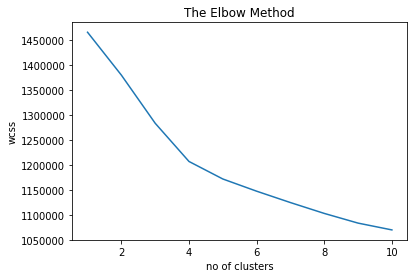

In [26]:
#Visualizing the ELBOW method to get the optimal value of K 
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
#lets also see Silhoutte
from sklearn.metrics import silhouette_score
range_n_clusters = [3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.06382843849786841)
For n_clusters = 4, silhouette score is 0.06213225860059025)
For n_clusters = 5, silhouette score is 0.0739536426841924)
For n_clusters = 6, silhouette score is 0.05814486839991037)
For n_clusters = 7, silhouette score is 0.05585688093442425)
For n_clusters = 8, silhouette score is 0.048810910391891706)


MemoryError: 

In [22]:
from sklearn.cluster import KMeans
def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model
kmeans3 = KMeans(3)

%time km3 = kmeans3.fit_predict(X)
kmeans4 = KMeans(4)

%time km4 = kmeans4.fit_predict(X)
kmeans5 = KMeans(5)

%time km5 = kmeans5.fit_predict(X)
kmeans6 = KMeans(6)

%time km6 = kmeans6.fit_predict(X)
kmeans7 = KMeans(7)

%time km7 = kmeans7.fit_predict(X)
kmeans8 = KMeans(8)

%time km8 = kmeans8.fit_predict(X)
kmeans9 = KMeans(9)

%time km9 = kmeans9.fit_predict(X)


CPU times: user 2min 12s, sys: 5.94 s, total: 2min 18s
Wall time: 41.9 s
CPU times: user 3min 3s, sys: 6.93 s, total: 3min 10s
Wall time: 59.2 s
CPU times: user 3min 31s, sys: 6.58 s, total: 3min 38s
Wall time: 1min 9s
CPU times: user 4min 38s, sys: 7.33 s, total: 4min 46s
Wall time: 1min 31s
CPU times: user 4min 36s, sys: 7.13 s, total: 4min 43s
Wall time: 1min 31s
CPU times: user 4min 32s, sys: 7.14 s, total: 4min 40s
Wall time: 1min 30s
CPU times: user 6min, sys: 8.32 s, total: 6min 9s
Wall time: 2min 2s


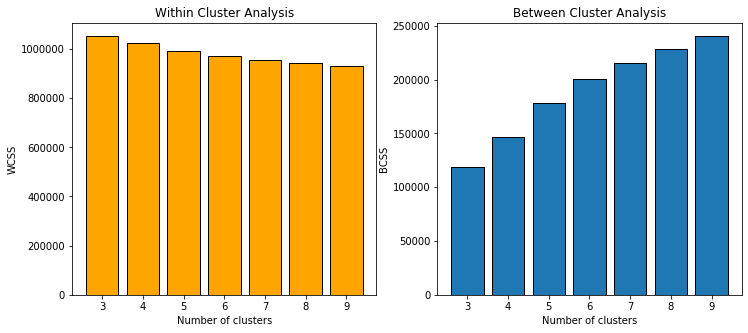

In [25]:
#Within cluster should be minimum.
#Between cluster should be maximum as much as possible.
#Silhouette score ranges from -1 and 1. The larger, the better.
models = [kmeans3,kmeans4,kmeans5, kmeans6, kmeans7,kmeans8,kmeans9]
def plot_WCSS_BCSS(models, data):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in models]
    n_clusts = [3,4,5,6,7,8,9]
    
    ax[0].bar(n_clusts, wcss,color='orange', edgecolor='black', linewidth=1)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    ax[0].set_title('Within Cluster Analysis')
    
    
    ## Plot BCSS 
    n_1 = (float(data.shape[0]) * float(data.shape[1])) - 1.0
    tss = n_1 * np.var(data)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss,edgecolor='black')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    ax[1].set_title('Between Cluster Analysis')
    plt.show()
    

plot_WCSS_BCSS(models,X)

In [26]:
#Lets try for 4,5,6 clusters
def prepare_df_Kmeans(corpus_df,i):
    
    km = KMeans(n_clusters=i, random_state=0)
    km.fit_transform(X)
    cluster_labels = km.labels_
    cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
    concat_df=pd.concat([corpus_df, cluster_labels], axis=1)
    return concat_df

In [27]:
for i in range(4,7):
    df_cluster=df.copy()
    concat_df=prepare_df_Kmeans(df_cluster,i)
    concat_df.to_csv("bio_w2v"+str(i)+"_12jun.csv")

In [50]:
cluster_labels

,ClusterLabel
0,3
1,0
2,0
3,3
4,3
...,...
386719,0
386720,0
386721,3
386722,0


In [1]:
# # #now lets understand how many clusetr we need lets try affinity Prop
# from sklearn.cluster import AffinityPropagation

# ap = AffinityPropagation()
# ap.fit(X)
# cluster_labels = ap.labels_
# cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
# pd.concat([df, cluster_labels], axis=1)